<a href="https://colab.research.google.com/github/amity1415/Insaid/blob/master/ML12LogisticRegressionTitanicDatasetupdated_191104_150755.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Logistic Regression on titanic dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Logistic Regression](#section4)<br>
    - 4.1 [Introduction of Logistic Regression](#section401)<br>
    - 4.2 [Mathematics behind Logistic Regression](#section402)<br>
    - 4.3 [Applications of Logistic Regression](#section402)<br>
    - 4.4 [Preparing X and y using pandas](#section403)<br>
    - 4.5 [Splitting X and y into training and test datasets.](#section404)<br>
    - 4.6 [Logistic regression in scikit-learn](#section406)<br>
    - 4.7 [Using the Model for Prediction](#section407)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model Evaluation using accuracy classification score](#section501)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section502)<br> 

<a id=section1></a>

### 1. Problem Statement

The goal is to __predict survival__ of passengers travelling in RMS __Titanic__ using __Logistic regression__.

<a id=section2></a>

### 2. Data Loading and Description
![image.png](attachment:image.png)

<a id=section201></a>

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |

#### Importing packages                                          

In [1]:
import sys
!{sys.executable} -m pip install pandas_profiling

In [0]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline


from subprocess import check_output

#### Importing the Dataset

In [0]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
891 - titanic_data.count()

#age - fill in the mean/median? - any central tendency
#Embarkment - mode (categotical)
#cabin  - remove it.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id=section3></a>

## 3. Preprocessing the data

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ and __Fare__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.

In [0]:
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])

In [0]:
median_age = titanic_data.Age.median()
median_fare = titanic_data.Fare.median()
titanic_data.Age.fillna(median_age, inplace = True)
titanic_data.Fare.fillna(median_fare, inplace = True)

In [25]:
titanic_data.drop('Cabin', axis = 1,inplace = True)

KeyError: ignored

In [27]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


- Creating a new feature named __FamilySize__.

In [0]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

- Segmenting __Sex__ column as per __Age__, Age less than 15 as __Child__, Age greater than 15 as __Males and Females__ as per their gender.

In [0]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [30]:
titanic_data[titanic_data.Age<15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,child


In [31]:
titanic_data[titanic_data.Age>15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female


In [0]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'GenderClass'],
      dtype='object')

In [0]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
FamilySize     891 non-null int64
GenderClass    891 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


- __Dummification__ of __GenderClass__ & __Embarked__.

In [0]:
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)

- __Dropping__ columns __'Name' , 'Ticket' , 'Sex' , 'SibSp' and 'Parch'__ 

In [32]:
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch', 'PassengerId'], axis = 1)
titanic.head()

,Survived,Pclass,Age,Fare,Embarked,GenderClass
0,0,3,22.0,7.2500,S,male
1,1,1,38.0,71.2833,C,female
2,1,3,26.0,7.9250,S,female
3,1,1,35.0,53.1000,S,female
4,0,3,35.0,8.0500,S,male


Drawing __pair plot__ to know the joint relationship between __'Fare' , 'Age' , 'Pclass' & 'Survived'__

Text(0.5, 1, 'Pair Plot')

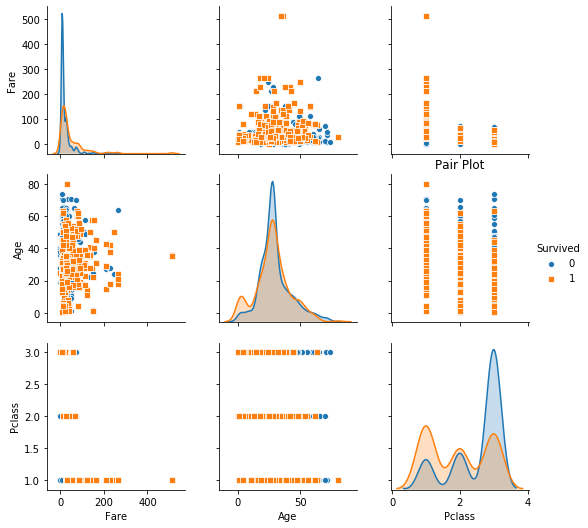

In [33]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

Observing the diagonal elements,
- More people of __Pclass 1__ _survived_ than died (First peak of red is higher than blue)
- More people of __Pclass 3__ _died_ than survived (Third peak of blue is higher than red)
- More people of age group __20-40 died__ than survived.
- Most of the people paying __less fare died__.

Establishing __coorelation__ between all the features using __heatmap__.

Text(0.5, 1, 'Correlation between features')

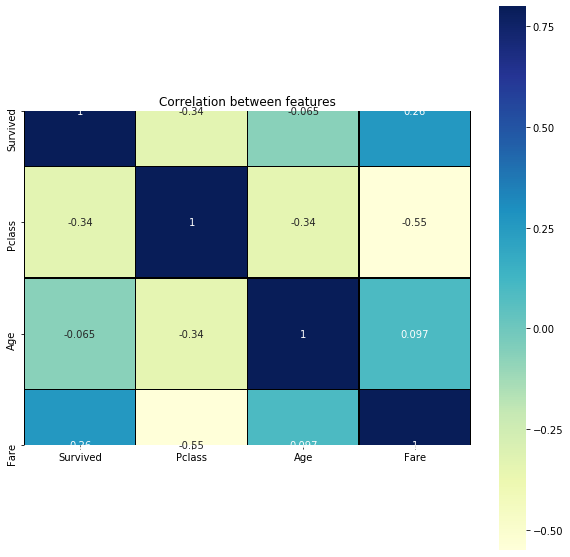

In [35]:
corr = titanic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [37]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embarked', 'GenderClass'], dtype='object')

In [0]:
titanic = titanic.drop(['GenderClass_female'], axis = 1)
titanic.head()

,Survived,Pclass,Age,Fare,FamilySize,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,1
1,1,1,38.0,71.2833,2,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,2,0,0,1
4,0,3,35.0,8.0500,1,1,0,1


Text(0.5, 1, 'Correlation between features')

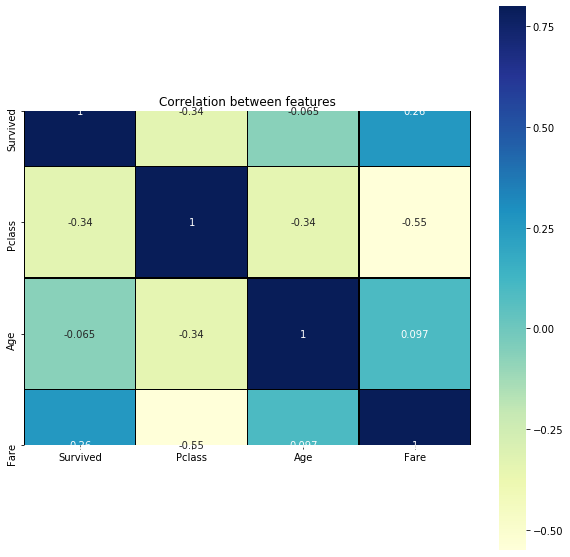

In [38]:
corr = titanic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

<a id=section4></a>

## 4. Logistic Regression

<a id=section401></a>

### 4.1 Introduction to Logistic Regression

Logistic regression is a techinque used for solving the __classification problem__.<br/> And Classification is nothing but a problem of __identifing__ to which of a set of __categories__ a new observation belongs, on the basis of _training dataset_ containing observations (or instances) whose categorical membership is known. <br/>For example to predict:<br/> __Whether an email is spam (1) or not (0)__ or,<br/> __Whether the tumor is malignant (1) or not (0)<br/>__
Below is the pictorial representation of a basic logistic regression model to classify set of images into _happy or sad._
![image.png](attachment:image.png)

Both Linear regression and Logistic regression are __supervised learning techinques__. But for the _Regression_ problem the output is __continuous__ unlike the _classification_ problem where the output is __discrete__. <br/>
- Logistic Regression is used when the __dependent variable(target) is categorical__.<br/>
- __Sigmoid function__ or logistic function is used as _hypothesis function_ for logistic regression. Below is a figure showing the difference between linear regression and logistic regression, Also notice that logistic regression produces a logistic curve, which is limited to values between 0 and 1. <br/> 
![image.png](attachment:image.png)

<a id=section402></a>

## 4.2 Mathematics behind Logistic Regression

The __odds__ for an event is the __(probability of an event occuring) / (probability of event not occuring)__:
![image.png](attachment:image.png)
For __Linear regression__: continuous response is modeled as a linear combination of the features: __y = β0 + β1x__<br/>
For __Logistic regression__: log-odds of a categorical response being "__true__" (1) is modeled as a linear combination of the features:

![image.png](attachment:image.png)
This is called the __logit function__.<br/>
On solving for probability (p) you will get:

![image.png](attachment:image.png)

![image.png](attachment:image.png)


Shown below is the plot showing __linear model__ and __logistic model__: 

![image.png](attachment:image.png)


In other words:

- Logistic regression outputs the __probabilities of a specific class__.
- Those probabilities can be converted into __class predictions__.


The logistic function has some nice properties:

- Takes on an __"s"__ shape
- Output is bounded by __0 and 1__<br/>


We have covered how this works for binary classification problems (two response classes). But what about __multi-class classification problems__ (more than two response classes)?

- Most common solution for classification models is __"one-vs-all"__ (also known as __"one-vs-rest"__): decompose the problem into multiple binary classification problems.
- __Multinomial logistic regression__ can solve this as a single problem.

<a id=section403></a>

## 4.3 __Applications of Logistic Regression__

Logistic Regression was used in __biological sciences__ in early twentieth century. It was then used in many social science applications. For instance,
- The Trauma and Injury Severity Score (TRISS), which is widely used to __predict mortality in injured patients__, was originally developed by Boyd et al. using logistic regression.<br/> 
- Many other medical scales used to __assess severity__ of a patient have been developed using logistic regression.<br/>
- Logistic regression may be used to __predict the risk of developing a given disease__ (e.g. diabetes; coronary heart disease), based on observed characteristics of the patient (age, sex, body mass index, results of various blood tests, etc.).<br/>

Now a days, Logistic Regression have the following applications 
1. Image segementation and  categorization
2. Geographic image processing
3. Handwriting recognition
4. Detection of  myocardinal infarction
5. Predict whether a person is depressed or not based on a bag of words from corpus. 
![image.png](attachment:image.png)

The reason why logistic regression is widely used despite of the state of the art of deep neural network is that logistic regression is very __efficient__ and does __not__ require too much __computational resources__, which makes it __affordable__ to run on production.

<a id=section404></a>

## 4.4 Preparing X and y using pandas

In [0]:
X = titanic.loc[:,titanic.columns != 'Survived']
X.head()

,Pclass,Age,Fare,FamilySize,GenderClass_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,2,1,0,1
1,1,38.0,71.2833,2,0,0,0
2,3,26.0,7.9250,1,0,0,1
3,1,35.0,53.1000,2,0,0,1
4,3,35.0,8.0500,1,1,0,1


In [0]:
y = titanic.Survived 

In [0]:
#scaling on X

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)                                                                                   # fit the data to Standardscaler

Xs = sc.transform(X)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(Xs, columns=X.columns).head()) 

After standardizing our features, the first 5 rows of our data now look like this:

     Pclass       Age      Fare  FamilySize  GenderClass_male  Embarked_Q  \
0  0.827377 -0.565736 -0.502445    0.059160          0.810021   -0.307562   
1 -1.566107  0.663861  0.786845    0.059160         -1.234536   -0.307562   
2  0.827377 -0.258337 -0.488854   -0.560975         -1.234536   -0.307562   
3 -1.566107  0.433312  0.420730    0.059160         -1.234536   -0.307562   
4  0.827377  0.433312 -0.486337   -0.560975          0.810021   -0.307562   

   Embarked_S  
0    0.615838  
1   -1.623803  
2    0.615838  
3    0.615838  
4    0.615838  


<a id=section405></a>

## 4.5 Splitting X and y into training and test datasets.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.20, random_state=1)

In [0]:
print(X_train.shape)
print(y_train.shape)

(712, 7)
(712,)


<a id=section406></a>

## 4.6 Logistic regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model

The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    accuracy_score(y_test,y_pred_test))
    ```

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<a id=section407></a>

## 4.7 Using the Model for Prediction

In [0]:
y_pred_train = logreg.predict(X_train)  

In [0]:
y_pred_test = logreg.predict(X_test)                                                           # make predictions on the testing set

In [0]:
y_pred_prob_test = logreg.predict_proba(X_test)  
y_pred_prob_test

#this is where we can change prob thresholf

array([[0.06733283, 0.93266717],
       [0.93271275, 0.06728725],
       [0.12189791, 0.87810209],
       [0.29041992, 0.70958008],
       [0.1891249 , 0.8108751 ],
       [0.92519405, 0.07480595],
       [0.91008996, 0.08991004],
       [0.07342529, 0.92657471],
       [0.53730908, 0.46269092],
       [0.36552616, 0.63447384],
       [0.92957816, 0.07042184],
       [0.3334411 , 0.6665589 ],
       [0.6704743 , 0.3295257 ],
       [0.81595905, 0.18404095],
       [0.29056837, 0.70943163],
       [0.58263194, 0.41736806],
       [0.68724586, 0.31275414],
       [0.94805616, 0.05194384],
       [0.94044898, 0.05955102],
       [0.47553045, 0.52446955],
       [0.93668774, 0.06331226],
       [0.92439698, 0.07560302],
       [0.02932149, 0.97067851],
       [0.7709634 , 0.2290366 ],
       [0.27429567, 0.72570433],
       [0.93159178, 0.06840822],
       [0.07433401, 0.92566599],
       [0.17196937, 0.82803063],
       [0.81172427, 0.18827573],
       [0.03606571, 0.96393429],
       [0.

- We need an evaluation metric in order to compare our predictions with the actual values.

<a id = section5></a>

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
We will use __accuracy score __ and __confusion matrix__ for evaluation.

<a id=section501></a>

### 5.1 Model Evaluation using __accuracy classification score__

In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.7932960893854749


<a id = section502></a>

### 5.2 Model Evaluation using confusion matrix

A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. <br/>
Below is a diagram showing a general confusion matrix.
![image.png](attachment:image.png)

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

    0   1
0  93  13
1  24  49


In [0]:
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  93                  13
Actual Survived              24                  49


This means 93 + 48 = __141 correct predictions__ & 25 + 13 = __38 false predictions__.

__Adjusting Threshold__ for predicting Died or Survived.

- In the section [4.7](#section4.7) we have used, __.predict__ method for classification. This method takes 0.5 as the default threshhod for prediction.<br/>
- Now, we are going to see the impact of changing threshold on the accuracy of our logistic regression model. <br/>
- For this we are going to use __.predict_proba__ method instead of using .predict method. 

Setting the threshold to __0.75__

In [0]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.7374301675977654


The accuracy have been __reduced__ significantly changing from __0.79 to 0.73__. Hence, 0.75 is __not a good threshold__ for our model. 

Setting the threshold to __0.25__

In [0]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 0.7486033519553073


The accuracy have been __reduced__, changing from __0.79 to 0.75__. Hence, 0.25 is also __not a good threshold__ for our model. <br/>
Later on we will see methods to identify the best threshold. 